In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = "D:/traffic/archive"


In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((48,48))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
np.save('D:/traffic/archive/training/data',data)
np.save('D:/traffic/archive/training/target',labels)


In [6]:
data=np.load('D:/traffic/archive/training/data.npy')
labels=np.load('D:/traffic/archive/training/target.npy')

In [7]:
print(data.shape, labels.shape)

(39209, 48, 48, 3) (39209,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 48, 48, 3) (7842, 48, 48, 3) (31367,) (7842,)


In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 223s 226ms/step - loss: 1.3465 - accuracy: 0.6712 - val_loss: 0.1804 - val_accuracy: 0.9568
Epoch 2/20
981/981 [==============================] - 228s 232ms/step - loss: 0.3325 - accuracy: 0.9054 - val_loss: 0.1119 - val_accuracy: 0.9721
Epoch 3/20
981/981 [==============================] - 208s 212ms/step - loss: 0.2355 - accuracy: 0.9326 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 4/20
981/981 [==============================] - 202s 206ms/step - loss: 0.1862 - accuracy: 0.9463 - val_loss: 0.0536 - val_accuracy: 0.9887
Epoch 5/20
981/981 [==============================] - 205s 209ms/step - loss: 0.1624 - accuracy: 0.9555 - val_loss: 0.0615 - val_accuracy: 0.9843
Epoch 6/20
981/981 [==============================] - 204s 208ms/step - loss: 0.1425 - accuracy: 0.9595 - val_loss: 0.0466 - val_accuracy: 0.9890
Epoch 7/20
981/981 [==============================] - 210s 215ms/step - loss: 0.1263 - accuracy: 0.9650 - val_loss: 0.0449 -

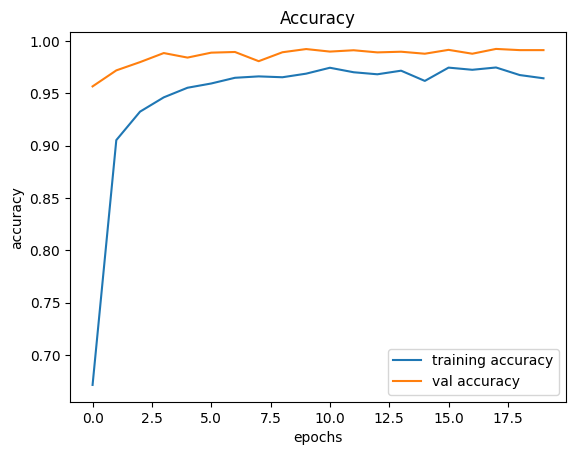

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

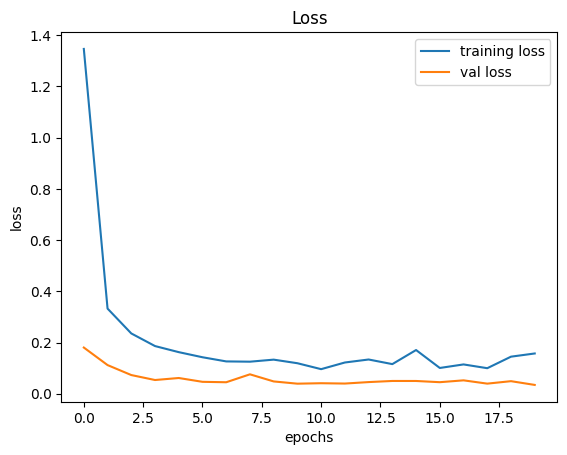

In [19]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [44]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((48,48))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [45]:
X_test, label = testing('D:/traffic/archive/Test.csv')

In [56]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 11s 27ms/step


array([[6.4616972e-27, 2.5104499e-18, 3.7118799e-23, ..., 4.6552942e-24,
        8.9051910e-22, 2.8283651e-24],
       [3.6925882e-23, 1.0000000e+00, 1.6854652e-22, ..., 7.5352197e-31,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.1159828e-30, 2.4735590e-24, ..., 4.3195180e-27,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.5630842e-05, 3.6354688e-01, 5.2701466e-04, ..., 1.1310483e-05,
        3.5410935e-07, 6.6370787e-03],
       [3.2064845e-15, 3.6818407e-10, 2.4861720e-08, ..., 1.5657160e-09,
        2.5201792e-16, 1.4707669e-13],
       [1.0784292e-10, 1.3255864e-08, 1.8199372e-06, ..., 7.3916344e-09,
        3.3523488e-13, 1.0195300e-10]], dtype=float32)

In [57]:
from sklearn.metrics import accuracy_score


Y_pred = np.argmax(Y_pred, axis=1)  


label = np.squeeze(label)  # Ensure label is a 1D array

accuracy = accuracy_score(label, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9632620744259699


In [24]:
model.save("D:/traffic/archive/training/TSD.h5")


C:\Users\Chris Mathew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from keras.models import load_model
model = load_model("D:/traffic/archive/training/TSD.h5")

In [26]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (48km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            48:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((48, 48))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = model.predict(X_test)
    predicted_class = np.argmax(Y_pred)
    return image, predicted_class

1/1 [==============================] - 0s 122ms/step
Predicted traffic sign is: General caution


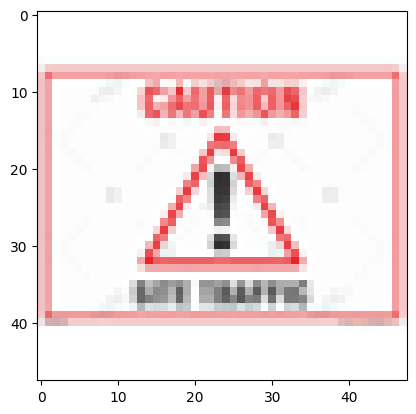

In [28]:
plot, prediction = test_on_img(r"D:/prod1-English-10547.jpg")
a = int(prediction)
print("Predicted traffic sign is:", classes[a])
plt.imshow(plot)
plt.show()